In [1]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import numpy as np

from math import ceil

import letalker as lt
from letalker.utils import strobe_timing
from letalker.constants import fs, _2pi

from matplotlib import pyplot as plt

C:\Users\Takeshi Ikuma\Documents\python-simvoice\src\letalker\elements\KinematicVocalFolds.py:988: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self.fo2L(fo, self.L0)


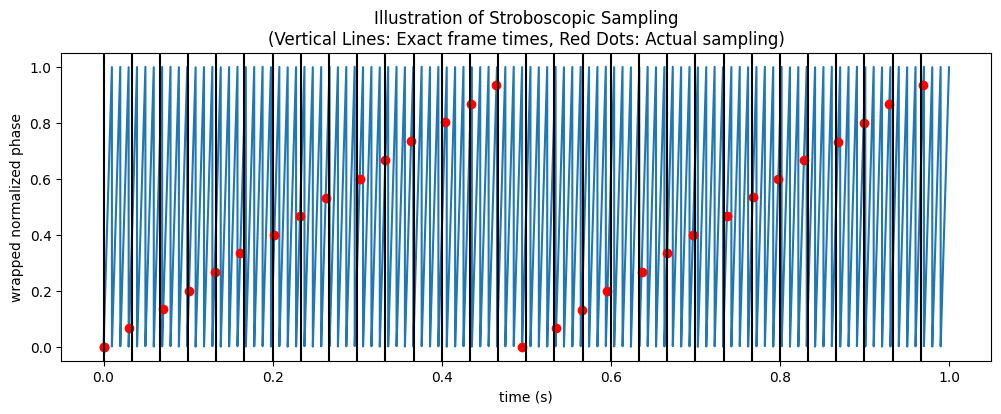

In [2]:
T = 1
N = int(T * fs)
t = np.arange(N) / fs
fo = 101

fr = 30  # video framerate

m_freq = 1 / 2
extent = 0.2

xiref = lt.SineGenerator(fo)
# xiref = ModulatedSineGenerator(fo, m_freq, am_extent=extent)
# xiref = ModulatedSineGenerator(fo, m_freq, fm_extent=extent)
# xiref = ModulatedSineGenerator(
#     [fo, fo * 3 / 2], m_freq, am_extent=extent, fm_extent=extent
# )

pout, res = lt.sim_kinematic(
    N, xiref, "aa", aspiration_noise=lt.LeTalkerAspirationNoise()
)

phi_wrapped = (xiref.phase(N) / _2pi) % 1.0

nframes = ceil(T * fr)  # number of video frames

# select the sampling instances for video (display 2 cycles/second)
nstrobe = strobe_timing(fr, res["vocalfolds"].fo, T, fstrobe=2)

# center samples of frames
nc = np.round(np.arange(nframes) * fs / fr).astype(int)  # center samples of frames

t = res["vocalfolds"].ts
plt.figure(figsize=[12, 4])
plt.plot(t, phi_wrapped, label="wrapped phase")
plt.plot(0, phi_wrapped[0], "or", label="selected sample")
plt.title(
    "Illustration of Stroboscopic Sampling\n(Vertical Lines: Exact frame times, Red Dots: Actual sampling)"
)
plt.xlabel("time (s)")
plt.ylabel("wrapped normalized phase")
i = 0
for i, (n, nsel) in enumerate(zip(nc, nstrobe)):
    plt.plot(t[nsel], phi_wrapped[nsel], "or")
    plt.axvline((i) / fr, c="k")

C:\Users\Takeshi Ikuma\Documents\python-simvoice\src\letalker\elements\KinematicVocalFolds.py:988: FutureWarning: functools.partial will be a method descriptor in future Python versions; wrap it in staticmethod() if you want to preserve the old behavior
  return self.fo2L(fo, self.L0)


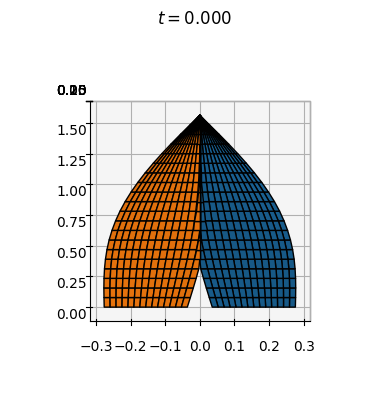

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# ax.view_init(22.5, -70) # good perspective view
ax.view_init(90, -90)  # top view
ax.set_proj_type("ortho")
ax.set_aspect("equal")
# with plt.ion():
#     for i in nstrobe:
#         res['vocalfolds'].draw3d(i, axes=ax)
#         plt.pause(1 / fr)


def animate(i):
    res["vocalfolds"].draw3d(nstrobe[i], axes=ax)
    ax.set_title(f"$t={nstrobe[i] / fs:0.3f}$")


ani = FuncAnimation(fig, animate, frames=nframes, interval=1 / fr)

HTML(ani.to_jshtml(fr))